# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [2]:
df = pd.read_csv("Superstore Marketing Data - Sheet1.csv")

In [52]:
df.shape

(2240, 22)

In [53]:
df.sample(5)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
765,7500,1967,Graduation,Single,79146.0,1,1,4/24/2014,33,245,...,21,43,16,2,8,1,8,6,0,0
405,10983,1952,Graduation,Together,75278.0,0,0,1/29/2013,17,304,...,150,74,74,1,6,3,13,3,0,0
2067,961,1972,Graduation,Married,74716.0,0,1,########,92,133,...,13,195,71,2,7,3,5,4,0,0
691,7922,1951,PhD,Single,64950.0,0,1,########,29,819,...,12,0,63,2,11,2,10,7,0,0
1368,2109,1990,Graduation,Single,96843.0,0,0,4/23/2013,60,448,...,40,17,17,1,6,11,10,2,1,0




**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [54]:
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [3]:
class FillingNullValue:
    """
    A class to handle missing values by filling them with the median income for each education group.
    """
    
    def __init__(self, input_df):
        """
        Initializes the FillingNullValue object.
        
        Parameters:
        - input_df (DataFrame): The input DataFrame containing the data.
        """
        try:
            self.output_df = input_df.copy()
        except Exception as e:
            print("An error occurred while initializing the object:", e)
            self.output_df = None
        
    def fit_transform(self, by='Education', column='Income', param='median'):
        """
        Fits the FillingNullValue object and transforms the input DataFrame.
        
        Parameters:
        - by (str): The column name to group by (default is 'Education').
        - column (str): The column to be transformed (default is 'Income').
        - param (str): The parameter to use for transformation (default is 'median').
        
        Returns:
        - output_df (DataFrame): The transformed DataFrame.
        """
        try:
            median_income_by_education = self.output_df.groupby(by)[column].transform(param)
            self.output_df[column] = self.output_df[column].fillna(median_income_by_education)
            return self.output_df
        except KeyError as e:
            print("An error occurred while transforming the DataFrame:", e)
            return None
        except Exception as e:
            print("An unexpected error occurred:", e)
            return None

In [4]:
# Example usage:
# Assuming df is your DataFrame containing the data
# Instantiate the FillingNullValue object
filling_nulls = FillingNullValue(df)
# Fit and transform the DataFrame
df = filling_nulls.fit_transform()

In [57]:
# Dataset Info
desc_df = pd.DataFrame(index=list(df))
desc_df['count'] = df.count()
desc_df['nunique'] = df.nunique()
desc_df['%unique'] = desc_df['nunique'] / len(df) * 100
desc_df['null'] = df.isnull().sum()
desc_df['type'] = df.dtypes
desc_df = desc_df.style.background_gradient(cmap='Greens')
desc_df

,count,nunique,%unique,null,type
Id,2240,2240,100.000000,0,int64
Year_Birth,2240,59,2.633929,0,int64
Education,2240,5,0.223214,0,object
Marital_Status,2240,8,0.357143,0,object
Income,2240,1976,88.214286,0,float64
Kidhome,2240,3,0.133929,0,int64
Teenhome,2240,3,0.133929,0,int64
Dt_Customer,2240,401,17.901786,0,object
Recency,2240,100,4.464286,0,int64
MntWines,2240,776,34.642857,0,int64


In [58]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [5]:
class FillingMissingDate:
    """
    A class to fill missing values in the 'Dt_Customer' column with mode values for each group of 'Recency'.
    """
    
    def __init__(self, input_df):
        """
        Initializes the FillingMissingDate object.
        
        Parameters:
        - input_df (DataFrame): The input DataFrame containing the data.
        """
        try:
            self.output_df = input_df.copy()
        except Exception as e:
            print("An error occurred while initializing the object:", e)
            self.output_df = None
        
    def fit_transform(self, date_column='Dt_Customer', group_column='Recency'):
        """
        Fits the FillingMissingDate object and transforms the input DataFrame by filling missing dates with mode values.
        
        Parameters:
        - date_column (str): The column containing dates with missing values (default is 'Dt_Customer').
        - group_column (str): The column used for grouping to calculate mode values (default is 'Recency').
        
        Returns:
        - output_df (DataFrame): The transformed DataFrame.
        """
        try:
            # Replace '########' with NaN in 'Dt_Customer' column
            self.output_df[date_column] = self.output_df[date_column].replace('########', np.nan)
            
            # Calculate mode values for each group of 'Recency'
            mode_values = self.output_df.groupby(group_column)[date_column].apply(lambda x: x.mode().iloc[0])
            
            # Fill missing values in 'Dt_Customer' column with mode values for each group
            self.output_df[date_column] = self.output_df.apply(lambda row: mode_values[row[group_column]] if pd.isnull(row[date_column]) else row[date_column], axis=1)
            
            # Convert 'Dt_Customer' column to datetime
            self.output_df[date_column] = pd.to_datetime(self.output_df[date_column])
            
            return self.output_df
        except KeyError as e:
            print("An error occurred while transforming the DataFrame:", e)
            return None
        except Exception as e:
            print("An unexpected error occurred:", e)
            return None

In [6]:
filling_missing_dates = FillingMissingDate(df)
# Fit and transform the DataFrame
df = filling_missing_dates.fit_transform()

**Report:**

**Steps taken to handle missing values:**

**1. Instantiated the FillingNullValue object with the input DataFrame.**

**2. Calculated the median income for each education group using the groupby() and transform() methods.**

**3. Filled the null values in the 'Income' column with the corresponding median income for each education group.**

**4. Returned the transformed DataFrame.**

**Report**

**The FillingMissingDate class is designed to handle missing values in the 'Dt_Customer' column of a DataFrame and ensure consistent data types throughout the transformation process. Here's how the class ensures data type consistency:**

**Initialization: Upon initialization, the class takes an input DataFrame containing the data. The DataFrame is copied to avoid modifying the original data.**

**Replacing Missing Values: The first step in the transformation process involves replacing any placeholder values, such as '########', with NaN (Not a Number) using the replace() method from NumPy. This ensures that missing values are uniformly represented as NaN, which is the standard missing value indicator in pandas.**

**Calculating Mode Values: Next, the class calculates the mode values for the 'Dt_Customer' column within each group of the 'Recency' column. This is achieved using the groupby() method to group the data by 'Recency', followed by the apply() method to calculate the mode value for each group.**

**Filling Missing Values: The missing values in the 'Dt_Customer' column are then filled with the mode values corresponding to their respective 'Recency' groups. This is accomplished using the apply() method along with a lambda function that checks if a value is missing (NaN) and replaces it with the mode value for the corresponding 'Recency' group.**

**Ensuring DateTime Data Type: Finally, after filling missing values, the 'Dt_Customer' column is converted to datetime data type using the pd.to_datetime() function. This ensures that the 'Dt_Customer' column contains consistent datetime values throughout the DataFrame.**

**By following these steps, the FillingMissingDate class ensures that missing values in the 'Dt_Customer' column are filled appropriately with mode values, and the data types remain consistent and appropriate for downstream analysis.**

Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

## Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [121]:
class DetailedCalculatedStats:
    """
    A class for calculating detailed statistics (mean, median, mode, variance, standard deviation, quartiles, minimum, and maximum) for numeric and categorical columns.
    """

    def __init__(self, input_df):
        """
        Initializes the DetailedCalculatedStats object.

        Parameters:
        - input_df (DataFrame): The input DataFrame containing the data.
        """
        try:
            self._input_df = input_df
            self.numeric_cols = self._input_df.select_dtypes(include='number').columns
            self.categoric_cols = self._input_df.select_dtypes(exclude='number').columns
            self.stats_df = None
        except Exception as e:
            print("An error occurred while initializing the object:", e)
            self.stats_df = None

    def fit(self):
        """
        Fits the DetailedCalculatedStats object by calculating statistics for numeric and categorical columns.
        """
        try:
            # Initialize the statistics DataFrame
            self.stats_df = pd.DataFrame(index=self.numeric_cols.append(self.categoric_cols))

            # Calculate statistics for numeric columns
            self.stats_df.loc[self.numeric_cols, 'Mean'] = self._input_df[self.numeric_cols].mean()
            self.stats_df.loc[self.numeric_cols, 'Median'] = self._input_df[self.numeric_cols].median()
            self.stats_df.loc[self.numeric_cols, 'Mode'] = self._input_df[self.numeric_cols].mode().iloc[0] if not self._input_df.empty else None  # Mode calculated for each numeric column
            self.stats_df.loc[self.numeric_cols, 'Variance'] = self._input_df[self.numeric_cols].var()
            self.stats_df.loc[self.numeric_cols, 'Standard_Deviation'] = self._input_df[self.numeric_cols].std()
            self.stats_df.loc[self.numeric_cols, '25%'] = self._input_df[self.numeric_cols].quantile(0.25)
            self.stats_df.loc[self.numeric_cols, '75%'] = self._input_df[self.numeric_cols].quantile(0.75)
            self.stats_df.loc[self.numeric_cols, 'Minimum'] = self._input_df[self.numeric_cols].min()
            self.stats_df.loc[self.numeric_cols, 'Maximum'] = self._input_df[self.numeric_cols].max()

            # Calculate mode for categorical columns
            self.stats_df.loc[self.categoric_cols, 'Mode'] = self._input_df[self.categoric_cols].mode().iloc[0] if not self._input_df.empty else None

            # Apply background gradient to enhance visualization
            self.stats_df = self.stats_df.style.background_gradient(cmap='Blues')
            
            return self.stats_df
        except KeyError as e:
            print("An error occurred while transforming the DataFrame:", e)
            return None
        except Exception as e:
            print("An unexpected error occurred:", e)
            return None

In [122]:
stats = DetailedCalculatedStats(df)

stats.fit()

stats.stats_df

,Mean,Median,Mode,Variance,Standard_Deviation,25%,75%,Minimum,Maximum
Id,5592.159821,5458.500000,0.000000,10540815.425093,3246.662198,2828.250000,8427.750000,0.000000,11191.000000
Year_Birth,1968.805804,1970.000000,1976.000000,143.617921,11.984069,1959.000000,1977.000000,1893.000000,1996.000000
Income,52242.594866,51498.500000,7500.000000,626954612.697227,25039.061738,35538.750000,68289.750000,1730.000000,666666.000000
Kidhome,0.444196,0.000000,0.000000,0.289873,0.538398,0.000000,1.000000,0.000000,2.000000
Teenhome,0.506250,0.000000,0.000000,0.296522,0.544538,0.000000,1.000000,0.000000,2.000000
Recency,49.109375,49.000000,56.000000,838.823673,28.962453,24.000000,74.000000,0.000000,99.000000
MntWines,303.935714,173.500000,2.000000,113297.804709,336.597393,23.750000,504.250000,0.000000,1493.000000
MntFruits,26.302232,8.000000,0.000000,1581.926033,39.773434,1.000000,33.000000,0.000000,199.000000
MntMeatProducts,166.950000,67.000000,7.000000,50947.429388,225.715373,16.000000,232.000000,0.000000,1725.000000
MntFishProducts,37.525446,12.000000,0.000000,2984.325391,54.628979,3.000000,50.000000,0.000000,259.000000


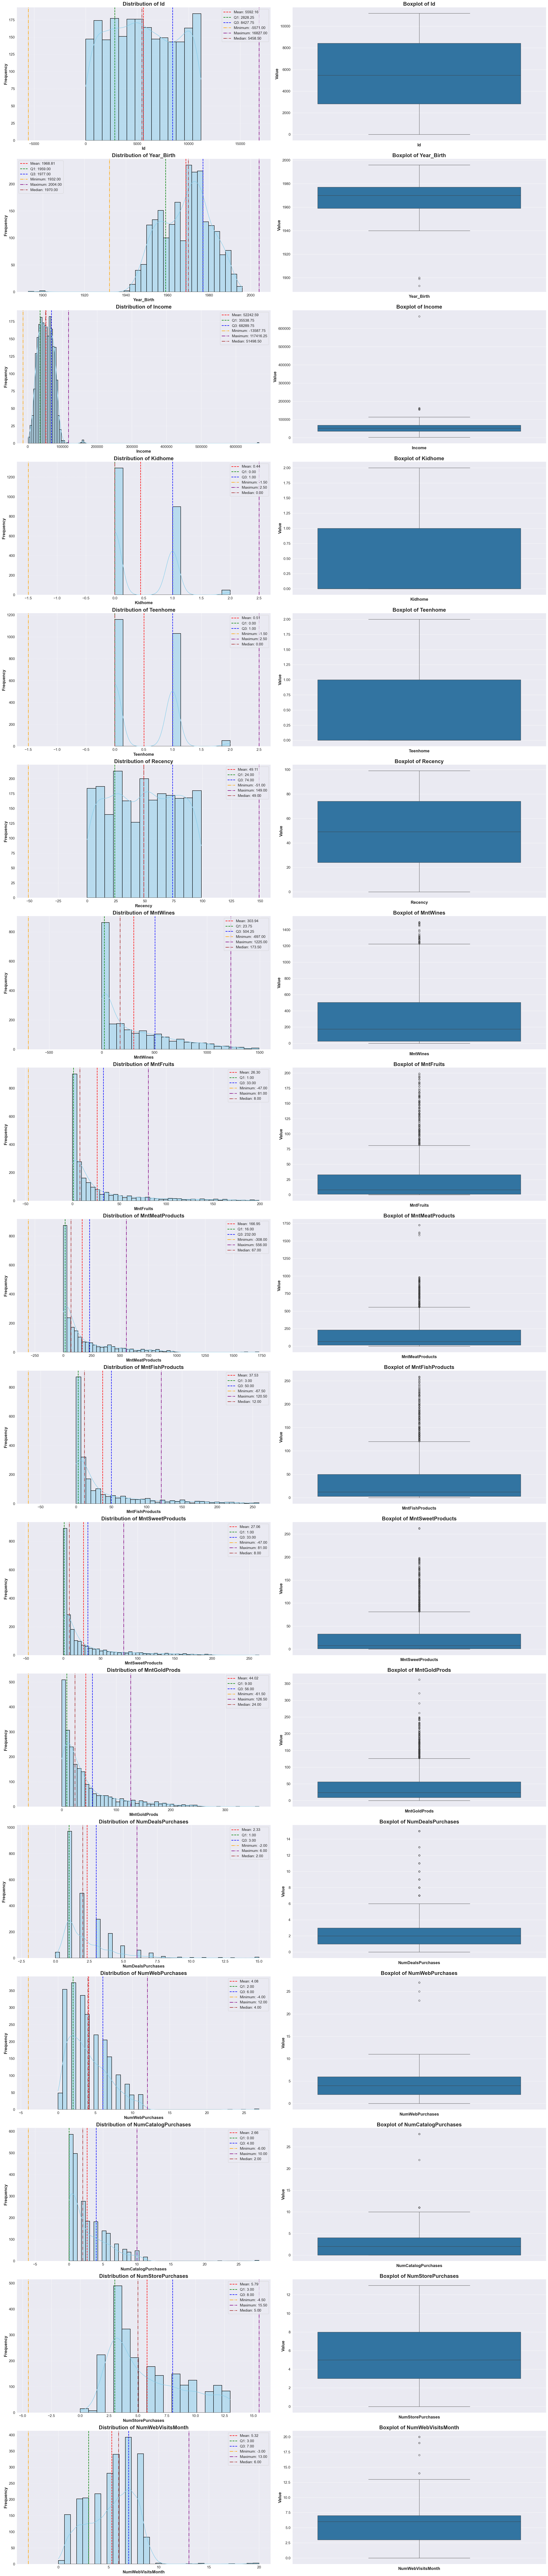

In [39]:
# Set style
sns.set_style("darkgrid")

# Get numeric columns
numeric_cols = df.select_dtypes(include='number').columns[:-2]

# Create subplots
fig, axs = plt.subplots(len(numeric_cols), 2, figsize=[29, 8 * len(numeric_cols)])

# Iterate over numeric columns
for i, col in enumerate(numeric_cols):
    # Create histogram
    sns.histplot(df[col], kde=True, color='skyblue', edgecolor='black', linewidth=1.5, ax=axs[i][0])
    # Create boxplot
    sns.boxplot(df[col], ax=axs[i][1])

    # Add labels and title to histogram
    axs[i][0].set_xlabel(col, fontsize=16, fontweight='bold')
    axs[i][0].set_ylabel('Frequency', fontsize=16, fontweight='bold')
    axs[i][0].set_title(f'Distribution of {col}', fontsize=20, fontweight='bold')
    # Add gridlines to histogram
    axs[i][0].grid(axis='y', linestyle='--', alpha=0.5)
    # Customize ticks
    axs[i][0].tick_params(axis='x', labelsize=14)
    axs[i][0].tick_params(axis='y', labelsize=14)
    # Remove top and right spines
    axs[i][0].spines['top'].set_visible(False)
    axs[i][0].spines['right'].set_visible(False)

    # Add annotations
    mean_val = df[col].mean()
    axs[i][0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # Plot IQR lines
    axs[i][0].axvline(Q1, color='green', linestyle='--', linewidth=2, label=f'Q1: {Q1:.2f}')
    axs[i][0].axvline(Q3, color='blue', linestyle='--', linewidth=2, label=f'Q3: {Q3:.2f}')
    # Add lines for minimum, maximum, and median
    min_val = Q1 - 1.5 * IQR
    max_val = Q3 + 1.5 * IQR
    median_val = df[col].median()
    axs[i][0].axvline(min_val, color='orange', linestyle='-.', linewidth=2, label=f'Minimum: {min_val:.2f}')
    axs[i][0].axvline(max_val, color='purple', linestyle='-.', linewidth=2, label=f'Maximum: {max_val:.2f}')
    axs[i][0].axvline(median_val, color='brown', linestyle='-.', linewidth=2, label=f'Median: {median_val:.2f}')
    # Add legend to histogram
    axs[i][0].legend(fontsize=14, loc='best')

    # Add labels and title to boxplot
    axs[i][1].set_xlabel(col, fontsize=16, fontweight='bold')
    axs[i][1].set_ylabel('Value', fontsize=16, fontweight='bold')
    axs[i][1].set_title(f'Boxplot of {col}', fontsize=20, fontweight='bold')
    # Customize ticks
    axs[i][1].tick_params(axis='x', labelsize=14)
    axs[i][1].tick_params(axis='y', labelsize=14)
    # Remove top and right spines
    axs[i][1].spines['top'].set_visible(False)
    axs[i][1].spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍